<a href="https://colab.research.google.com/github/PelumiOgunlusi/PelumiOgunlusi/blob/main/Part_II_slide_deck_Ogunlusi_Pelumi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part II - (Explanatory Visulalization Ford GoBike System)
## by (OGUNLUSI PELUMI)

## Investigation Overview


> The overall goal of this presentation slide deck is to check for the influence of 3 singular variables on the ride duration as well as to compare the effect of two selected categorical variables on ride duration against the effect of one categorical and one numerical variable on ride duration.
<br>
<br>
> For the slide deck presentation, I focus on just the influence of the three variables namely Weekday, Time of Day, Age of rider on the length of rides while leaving out most of the intermediate derivations. 
<br>I start by introducing the distribution of the ride duration variable, 
<br> This is then followed by showing the relationship between the 3 variables mentioned above and the Ride duration one by one. 
<br>Afterwards, I then look at the influence of one categorical & one numeric (variable bike usage and Age) on ride trip duration. 
<br>Finally, I conclude the project by checking the influence of two categorical variables(Round Trip and Weekday) on the variable of interest (Ride duration)




## Dataset Overview

> The Dataset includes information about individual rides made in a bike-sharing system covering the greater San-Francisco Bay Area. The data consists of information regarding trips taken by members of the bike sharing service. The dataset contains about 183412 different entries of rides taken using the bike sharing service. It however only contains rides for the month of February, 2019.

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [ ]:
# load in the dataset into a pandas dataframe
df = pd.read_csv(r"C:\Users\pelumi Ogunlusi\Desktop\Project Template\Ford Go Bike Data cleaned.csv")

## (Disribution of ride duration in minutes)

> Ride duration in minutes in the dataset take on a very large range of values, from about 1 minute at the lowest, to about 1424 minutes at the highest. Plotted on a logarithmic scale, the distribution of diamond prices takes on a unimodal shape.

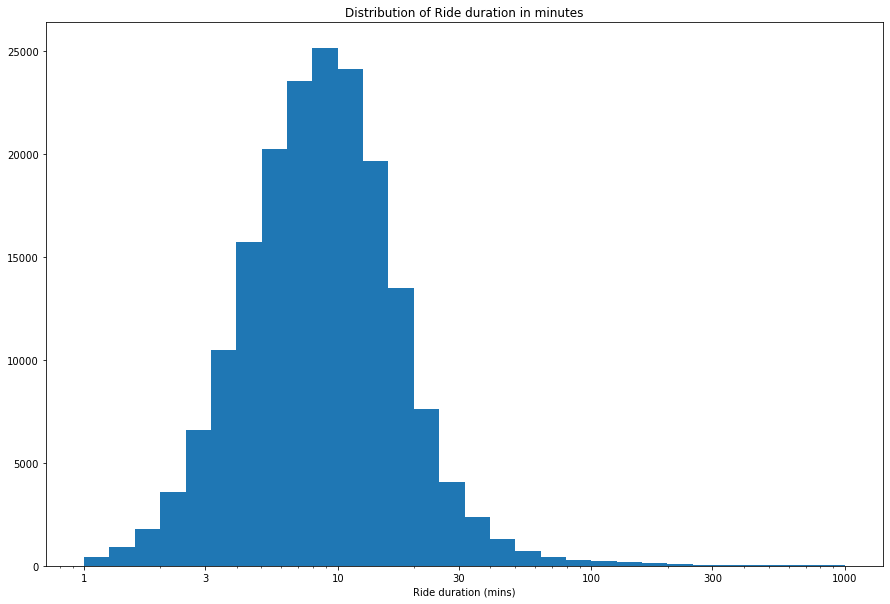

In [ ]:
# plotting the distribution of the minutes column with x axis scaled using log transformation
plt.figure(figsize=(15,10))
bins = 10 ** np.arange(0, 3+0.1, 0.1)
plt.hist(data = df, x = 'minutes', bins=bins)
plt.xscale('log')
plt.xlabel('Ride duration (mins)')
plt.title ('Distribution of Ride duration in minutes')
plt.xticks([1,3,10,30,100,300,1000],['1','3','10','30','100','300','1000']);

## (Influence of Weekdays on Ride duration)

> There is a clear indication that weekends i.e  Friday and Saturday have the longest ride duration and this was previously expected as more customers are more likely to use the service during the weekemds.

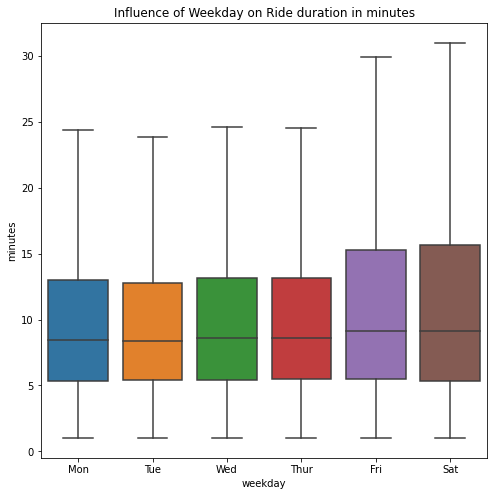

In [ ]:
# plotting a chart to show relationship between weekday and Ride duration 
plt.figure(figsize=(8,8))
plt.title('Influence of Weekday on Ride duration in minutes')
sns.boxplot(data=df, x='weekday', y='minutes', order=['Mon','Tue','Wed','Thur','Fri','Sat'],showfliers=False);

## (Influence of Time of day on Ride duration)

 > From the plot, we can see the average ride duration peaks during the day roughly between 9am to 6pm

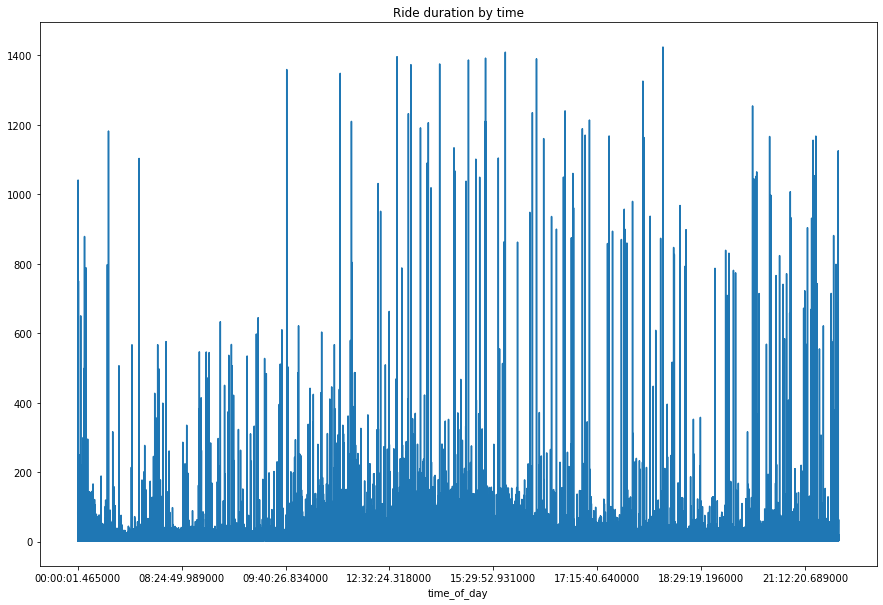

In [ ]:
# making a plot to see ride duration during different times of the day
plt.figure(figsize=(15,10))
plt.title('Ride duration by time')
df.groupby('time_of_day')['minutes'].mean().plot(kind='line');

## (Influence of Age of Rider on Ride duration)

 > From the plot, we can seee that most riders spend less than 30 minutes during rides and those that actually take longer rides (1 hour or greater) are are the young adults (aged 30 below)

In [ ]:
### (Due to the enormosity of the points in the data, describing the relationship between these 2 variables will be difficult.Hence, I randomly picked 200 samples from the data for easier plotting.)
bike_sample=df.sample(200)

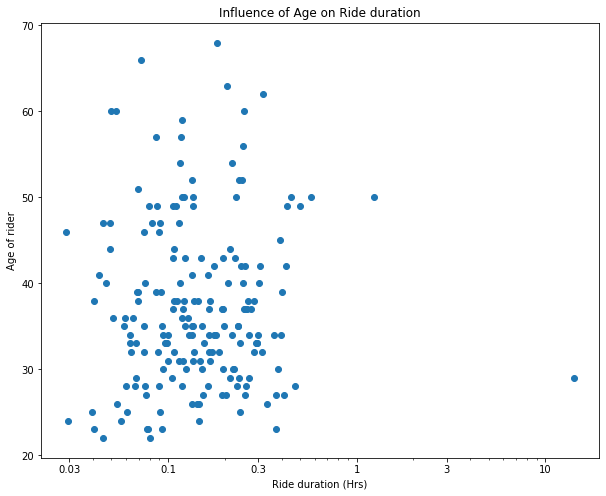

In [ ]:
# plotting a scatter plot to show relationship between Age of riders and hours spent on rides after scaling the x axis
plt.figure(figsize=(10,8))
plt.scatter(data = bike_sample, x = 'hours', y = 'Age_of_rider')
plt.xscale('log')
plt.xlabel('Ride duration (Hrs)')
plt.ylabel('Age of rider')
plt.title('Influence of Age on Ride duration')
plt.xticks([0.03,0.1,0.3,1,3,10],['0.03','0.1','0.3','1','3','10']);

## (Influence of Bike Usage type and Age of Rider on Ride duration)

 > From the plot, we can see that majority of users that use the bike sharing system for all trips('Yes') usually travel for 18 mins or less while those that do not use the bike sharing system regularly could go up to > 1 hour trip duration and most users fall beow 70 years of Age.

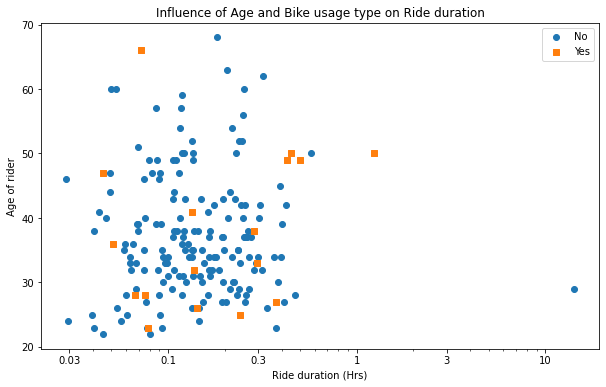

In [ ]:
# plotting a multivariate chart to  show the relationship between bike usage type, age of rider and Ride duration in hours
plt.figure(figsize=(10,6))
cat_markers = [['No', 'o'],
               ['Yes', 's']]
for cat, marker in cat_markers:
    df_cat = bike_sample[bike_sample['bike_share_for_all_trip'] == cat]
    plt.xscale('log')
    plt.xlabel('Ride duration (Hrs)')
    plt.ylabel('Age of rider')
    plt.title('Influence of Age and Bike usage type on Ride duration')
    plt.scatter(data = df_cat, x = 'hours', y = 'Age_of_rider', marker = marker)
    plt.xticks([0.03,0.1,0.3,1,3,10],['0.03','0.1','0.3','1','3','10'])
plt.legend(['No','Yes']);

## (Influence of Round trip and Weekdays on Ride duration)

 > From the plot, we can see that when round trips are taken ('Yes'), it typically takes longer for the ride to finish. However, we see a significantly longer ride duration recored on saturdays compared to other days when round trips are taken. This could be as a result of traffic on this particular day as most people are not at their workplaces.

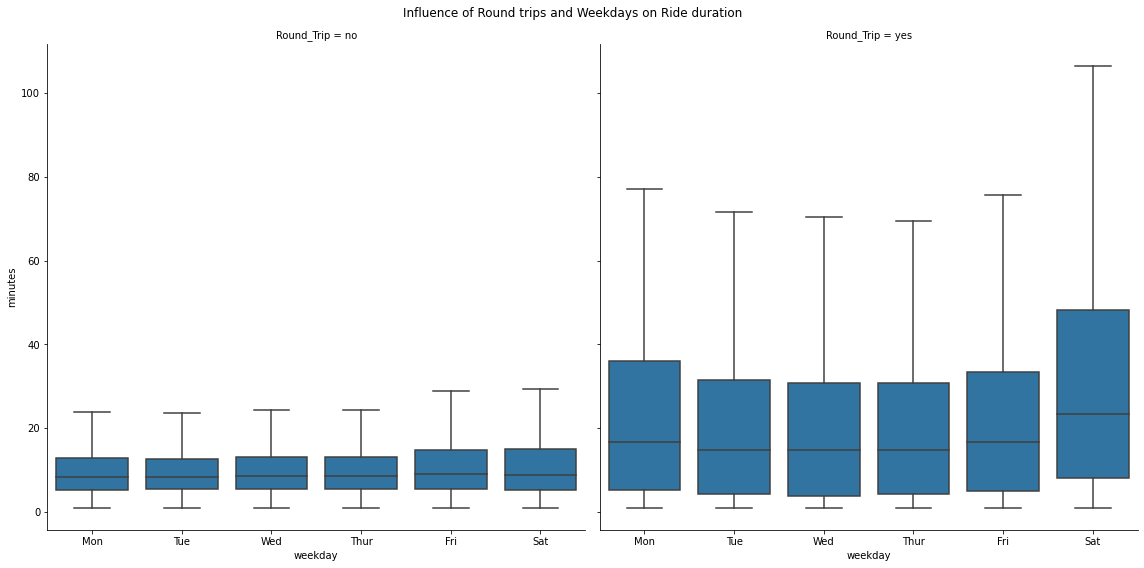

In [ ]:
# Plot a multivariate chart to show relationship bewteen Roundtrip, Weekdays, and Ride duration
g = sns.FacetGrid(data = df, col = 'Round_Trip', height= 8, aspect=1)
g.fig.suptitle('Influence of Round trips and Weekdays on Ride duration')
g.map(sns.boxplot,'weekday','minutes',order=['Mon','Tue','Wed','Thur','Fri','Sat'], showfliers = False);

In [ ]:
!jupyter nbconvert Part_II_slide_deck_Ogunlusi_Pelumi.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_Ogunlusi_Pelumi.ipynb to slides
[NbConvertApp] Writing 710093 bytes to Part_II_slide_deck_Ogunlusi_Pelumi.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\ProgramData\Anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_note